In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 3].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [3]:
# sunset, sunrise 단위를 분으로 고치기
station["sunrise"] = ((station["sunrise"].astype("int64")// 100 * 60) + (station['sunrise'].astype("int64") % 100))
station["sunset"] = ((station['sunset'].astype("int64") // 100 * 60) + (station['sunset'].astype("int64") % 100))

# daytime 계산
station["daytime"] = station["sunset"] - station["sunrise"]

In [4]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,455,1040,MD,0.0,0.0,29.77,30.47,9.9,31.0,10.0,2012,1,1,44.134698,39.219963,585,6,1,0,0,0,1
1,3,2012-01-02,45.0,24.0,34.5,-1.0,11.0,28.0,30.0,0.0,455,1041,MD,0.0,0.0,29.89,30.63,7.7,32.0,8.2,2012,1,2,37.199918,27.774436,586,0,0,0,0,0,1
2,3,2012-01-03,55.0,21.0,38.0,2.0,19.0,32.0,27.0,0.0,455,1041,MD,0.0,0.0,29.55,30.34,11.6,17.0,11.8,2012,1,3,45.921007,30.407099,586,1,0,0,0,0,1
3,3,2012-01-04,63.0,31.0,47.0,11.0,26.0,37.0,18.0,0.0,455,1042,MD,0.0,0.0,29.53,30.27,2.5,31.0,4.9,2012,1,4,43.631906,44.759688,587,2,0,0,0,0,1
4,3,2012-01-05,68.0,31.0,49.5,14.0,28.0,41.0,15.0,0.0,455,1043,MD,0.0,0.0,29.35,30.11,7.3,19.0,7.6,2012,1,5,43.146599,46.322991,588,3,0,0,0,0,1


In [5]:
len(station)

1035

In [6]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 31 ( 3.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 0 ( 0.0 % )
sunset : 0 ( 0.0 % )
codesum : 0 ( 0.0 % )
snowfall : 0 ( 0.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 0 ( 0.0 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 0 ( 0.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [7]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [8]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [9]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
304357,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,107,0
304358,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,108,0
304359,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,109,0
304360,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,110,0
304361,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,111,0


In [10]:
station['log1p_units'] = np.log1p(station.units)

In [11]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [12]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
304357,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,107
304358,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,108
304359,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,109
304360,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,110
304361,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,111


In [13]:
len(station)

304362

In [14]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [15]:
df2.to_csv("station3.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [17]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + sunset + sunrise + daytime + C(year) + C(month) + relative_humility \
                            + windchill + weekend + C(rainY) + C(store_nbr) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1246.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:24:04   Log-Likelihood:            -1.1798e+06
No. Observations:              304362   AIC:                         2.360e+06
Df Residuals:                  304184   BIC:                         2.362e+06
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]      5.8815      9

### 2. OLS : df1 (units) - 스케일링 

In [18]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1246.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:26:20   Log-Likelihood:            -1.1798e+06
No. Observations:              304362   AIC:                         2.360e+06
Df Residuals:                  304184   BIC:                         2.362e+06
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [19]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

6904

In [20]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
297453,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,107,0
297454,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,108,0
297455,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,109,0
297456,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,110,0
297457,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,111,0


In [21]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) +scale(sunset) + scale(sunrise) + scale(daytime)\
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     7528.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:29:22   Log-Likelihood:            -6.0381e+05
No. Observations:              297458   AIC:                         1.208e+06
Df Residuals:                  297280   BIC:                         1.210e+06
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

R square 가 두배가 되었고, conditional number도 상승했다.

### 4. 변수변환 : df2 (log1p_units) 

In [22]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1313.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:32:07   Log-Likelihood:            -1.9106e+05
No. Observations:              304362   AIC:                         3.825e+05
Df Residuals:                  304184   BIC:                         3.844e+05
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야함

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [23]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

16844

In [24]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
287513,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,107,0.0
287514,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,108,0.0
287515,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,109,0.0
287516,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,110,0.0
287517,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,405,1049,MD,0.0,0.0,29.65,30.36,11.1,35.0,11.5,2014,10,31,62.465729,38.046534,644,4,0,0,0,0,1,33,111,0.0


In [25]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:34:25   Log-Likelihood:             5.5917e+05
No. Observations:              287518   AIC:                        -1.118e+06
Df Residuals:                  287342   BIC:                        -1.116e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

설명력이 많이 올라갔다, conditional number는 약간 낮아짐

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [26]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) \
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.595e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:36:17   Log-Likelihood:             5.5917e+05
No. Observations:              287518   AIC:                        -1.118e+06
Df Residuals:                  287340   BIC:                        -1.116e+06
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

R^2값이 1에 가까워지고 조건수는 변화없어 과최적화가 의심

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/sunset/sunrise/daytime/sealevel제거(VIF에 근거)

In [30]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed) + scale(stnpressure) \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.641e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:46:53   Log-Likelihood:             5.5917e+05
No. Observations:              287518   AIC:                        -1.118e+06
Df Residuals:                  287345   BIC:                        -1.116e+06
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [35]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool) + scale(stnpressure)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:50:19   Log-Likelihood:             5.5917e+05
No. Observations:              287518   AIC:                        -1.118e+06
Df Residuals:                  287347   BIC:                        -1.116e+06
Df Model:                         170                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+stnpressure/windchill제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [45]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool) + scale(relative_humility)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + C(year) + C(month) + scale(avgspeed) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:57:30   Log-Likelihood:             5.5917e+05
No. Observations:              287518   AIC:                        -1.118e+06
Df Residuals:                  287349   BIC:                        -1.116e+06
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

stnpressure/windchill추가로 지웠더니 conditional number 757까지 감소

### 6 - 4. 변수변환 : df2 (log1p_units) + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+stnpressure/windchill/avgspeed제거(VIF에 근거)  + 유의하지 않은 변수 제거 -> 정규화

In [54]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(weekend) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.498e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:05:25   Log-Likelihood:             5.5910e+05
No. Observations:              287518   AIC:                        -1.118e+06
Df Residuals:                  287404   BIC:                        -1.117e+06
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(weekend)[0]       2.181e-05      0

### F- 검정

In [55]:
sm.stats.anova_lm(model2_1_1.fit())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(weekend),2.0,6.413677,3.206838,2675.541615,0.0
C(store_nbr),2.0,4.331864,2.165932,1807.088780,0.0
C(item_nbr),110.0,3378.153064,30.710482,25622.486976,0.0
Residual,287404.0,344.475362,0.001199,NaN,NaN


### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

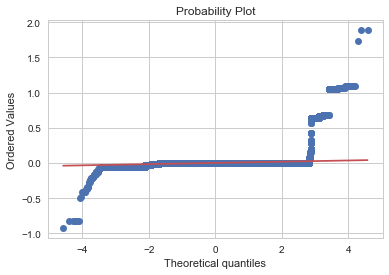

In [56]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [122]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',\
         'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'daytime', 'item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,sunrise
1,inf,sunset
2,inf,daytime
3,8.014108e+07,tmin
4,1.848832e+06,tmax
5,1.076675e+06,sealevel
6,9.140025e+05,tavg
7,4.012416e+05,stnpressure
8,7.558007e+03,windchill
9,3.434579e+03,wetbulb


tmax, sunrise, tavg, daytime, tmin, sunset, sealevel를 빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

In [31]:
cols = ['dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr', 'stnpressure']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,3263.720768,wetbulb
1,2698.028490,dewpoint
2,2344.407271,windchill
3,2133.852276,stnpressure
4,568.569116,relative_humility
5,122.980967,heat
6,53.233858,cool
7,35.523347,avgspeed
8,21.731825,resultspeed
9,4.295859,item_nbr


### VIF : wetbulb 버리고 다시 

In [33]:
cols = ['dewpoint', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr', 'stnpressure']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,1759.990233,dewpoint
1,113.037174,heat
2,51.386774,cool
3,1.045352,snowfall
4,1.275664,preciptotal
5,21.723856,resultspeed
6,35.325848,avgspeed
7,550.871775,relative_humility
8,2297.436681,windchill
9,4.295859,item_nbr


### VIF : dewpoint 버리고 다시 

In [38]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', 'stnpressure',\
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,1341.719260,stnpressure
1,1246.870926,windchill
2,105.428457,heat
3,49.260735,cool
4,34.476439,avgspeed
5,22.493084,relative_humility
6,21.723798,resultspeed
7,4.295836,item_nbr
8,1.258157,preciptotal
9,1.045343,snowfall


### VIF : stnpressure 버리고 다시 

In [41]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed','avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,36.081418,windchill
1,33.719711,avgspeed
2,22.151157,relative_humility
3,21.660175,resultspeed
4,5.284153,cool
5,4.286130,item_nbr
6,3.385463,heat
7,1.258015,preciptotal
8,1.044482,snowfall


### VIF :  windchill 버리고 다시 

In [43]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'item_nbr', 'avgspeed', 'relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,30.102993,avgspeed
1,20.874231,resultspeed
2,7.879693,relative_humility
3,3.935202,item_nbr
4,2.171332,heat
5,2.063272,cool
6,1.189680,preciptotal
7,1.039027,snowfall


### VIF :  avgspeed 버리고 다시 

In [46]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'item_nbr', 'relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,6.684299,relative_humility
1,3.883218,item_nbr
2,3.633133,resultspeed
3,2.161658,heat
4,2.060204,cool
5,1.180908,preciptotal
6,1.037357,snowfall


### 9. 정규화 후 Cross validation(교차검증)
- 6-4번 model 사용
- 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)

In [57]:
from patsy import dmatrix

In [58]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [59]:
len(df2_1_X), len(df2_1_target)

(287518, 287518)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [60]:
formula = 'C(weekend) + C(store_nbr) + C(item_nbr) + 0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.89617487, 0.87595315, 0.92492863, 0.91884745, 0.8858424 ,
       0.90573979, 0.90366383, 0.9087136 , 0.91369246, 0.91336232])

In [62]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

array([0.01375415, 0.01345389, 0.01294127, 0.01391268, 0.01373925,
       0.01397655, 0.01365915, 0.01355896, 0.01403491, 0.01305157])

In [63]:
# Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores2 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=1)
    y_pred = model.predict(X_test)
    scores2[i] = r2_score(y_test, y_pred)

scores2

array([-0.00136973, -0.00181479, -0.00204545, -0.00169422, -0.00143393,
       -0.00133046, -0.00165127, -0.00165967, -0.00157298, -0.00180498])

In [64]:
# Elasic net
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores3 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0.5)
    y_pred = model.predict(X_test)
    scores3[i] = r2_score(y_test, y_pred)

scores3

array([-0.00136973, -0.00181479, -0.00204545, -0.00169422, -0.00143393,
       -0.00133046, -0.00165127, -0.00165967, -0.00157298, -0.00180498])

### station 평균성능

In [65]:
scores.mean(), scores1.mean(), scores2.mean(), scores3.mean()

(0.9046918502904904,
 0.013608239106870956,
 -0.001637748597187283,
 -0.001637748597187283)